In [40]:
import pandas as pd 

## Data collection and preprocessing

In [41]:
books = pd.read_csv('books.csv',error_bad_lines = False)
ratings = pd.read_csv('ratings.csv',error_bad_lines = False)
tags = pd.read_csv('book_tags.csv',error_bad_lines = False)
btags = pd.read_csv('tags.csv',error_bad_lines = False)

In [42]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [43]:
books.shape

(10000, 23)

In [44]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [46]:
tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [52]:
#Checking for duplicates in ratings
ratings = ratings.sort_values("user_id")
print(ratings.shape)
ratings.drop_duplicates(subset =["user_id","book_id"], 
                     keep = False, inplace = True) 
print(ratings.shape)

(5976479, 3)
(5976479, 3)


Therefore, there are no duplicates in the ratings dataset, continuing the same for the rest.

In [53]:
print(books.shape)
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
print(books.shape)

(10000, 23)
(9151, 23)


In books, 849 duplicate rows are now removed.

In [55]:
print(btags.shape)
btags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
print(btags.shape)

(34252, 2)
(34252, 2)


No duplicates here as well.

In [56]:
print(tags.shape)
tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
print(tags.shape)

(999912, 3)
(999896, 3)


16 duplicates removed.

## Data exploration 

In [60]:
#Joining book tags and tags
joint_tags=pd.merge(tags,btags,left_on='tag_id',right_on='tag_id',how='inner')
print(joint_tags.head())

   goodreads_book_id  tag_id   count tag_name
0                  1   30574  167697  to-read
1                  2   30574   24549  to-read
2                  3   30574  496107  to-read
3                  5   30574   11909  to-read
4                  6   30574     298  to-read


### Top 10 rated books 

In [73]:
top_rated=books.sort_values('average_rating', ascending=False)
top10=top_rated.head(10)
f=['title']
top10=(top10[f])
top10.set_index('title', inplace=True)

In [74]:
top10

""
title
The Complete Calvin and Hobbes
"Words of Radiance (The Stormlight Archive, #2)"
Mark of the Lion Trilogy
It's a Magical World: A Calvin and Hobbes Collection
There's Treasure Everywhere: A Calvin and Hobbes Collection
"Harry Potter Boxset (Harry Potter, #1-7)"
"Harry Potter Collection (Harry Potter, #1-6)"
The Indispensable Calvin and Hobbes
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury


### Top 10 popular books

In [77]:
pop10=books.sort_values(by='ratings_count', ascending=False)
f=['title']
pop10=pop10.head(10)

pop10=(pop10[f])
pop10=pop10.set_index('title')

In [75]:
pop10

""
title
"The Hunger Games (The Hunger Games, #1)"
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"
To Kill a Mockingbird
The Great Gatsby
The Fault in Our Stars
The Hobbit
The Catcher in the Rye
Pride and Prejudice
"Angels & Demons (Robert Langdon, #1)"


### Most Common Rating Values

### Highly rated authors

### Finding popular genres and books available for those.

### Analysing the relation between no of editions and ratings

## Collaborative filtering using k Nearest Neighbors

### Dropping null values if any

In [82]:
usecols=['book_id', 'original_title']
books_col=books[usecols]
books_col.shape

(9151, 2)

In [83]:
books_col.dropna()

,book_id,original_title
0,1,The Hunger Games
1,2,Harry Potter and the Philosopher's Stone
3,4,To Kill a Mockingbird
4,5,The Great Gatsby
5,6,The Fault in Our Stars
...,...,...
9995,9996,Bayou Moon
9996,9997,Means of Ascent
9997,9998,The Mauritius Command
9998,9999,Cinderella Ate My Daughter: Dispatches from th...


In [84]:
books_col.shape

(9151, 2)

### Creating Compressed sparse row matrix

In [86]:
from scipy.sparse import csr_matrix
# pivot ratings into movie features
df_book_features = ratings.pivot(index='book_id',columns='user_id',values='rating').fillna(0)
df_book_features.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0
4,5.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,5.0
5,0.0,5.0,0.0,4.0,0.0,0.0,3.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0


In [87]:
mat_book_features = csr_matrix(df_book_features.values)

In [89]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)


num_users = len(ratings.user_id.unique())
num_items = len(ratings.book_id.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 53424 unique users and 10000 unique movies in this data set


In [90]:
ratings=ratings.dropna()

In [91]:
df_ratings_cnt_tmp = pd.DataFrame(ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp.head(10)

,count
rating,
1,124195
2,359257
3,1370916
4,2139018
5,1983093


In [93]:
# shape[0] then it will gave you the number of rows. shape[1] will gave you number of columns.
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt


,count
0.0,528263521
1.0,124195
2.0,359257
3.0,1370916
4.0,2139018
5.0,1983093


The number of books rated 0 or are unrated = 528263521. These books should be removed. Let us first look at the impact and check if they can be removed.

Text(0, 0.5, 'number of ratings')

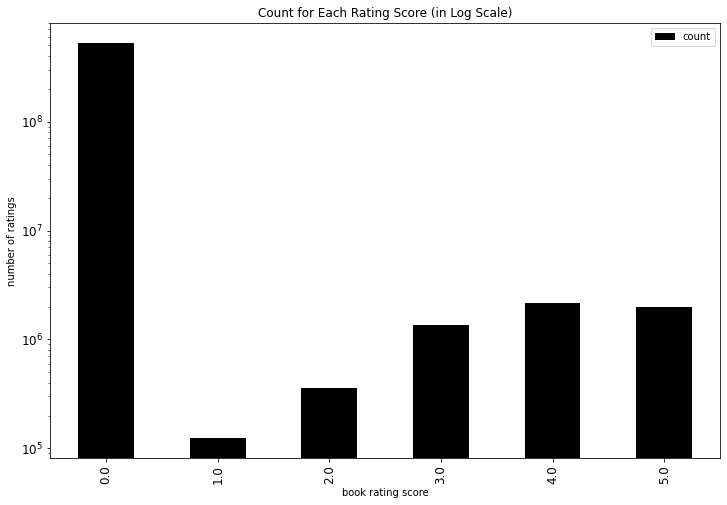

In [94]:
import numpy as np
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

import matplotlib.pyplot as plt


get_ipython().run_line_magic('matplotlib', 'inline')
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,color='black'
)
ax.set_xlabel("book rating score")
ax.set_ylabel("number of ratings")

Providing recommendations on data with so much of irrelevant data may not be accurate, so the books that have rating count 0 or unrated can be removed.  

In [ ]:
import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud,STOPWORDS

%matplotlib inline


plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}